![alt text](https://miro.medium.com/max/755/1*Aydiurid-v3wwHQbTZ5Kaw.jpeg "The cities that form the triangle, North Carolina")

<a name="top"></a>
# GUIDE TO LIVING IN RESEARCH TRIANGLE PARK, NC

*This project will attempt to create a **guide on neighborhoods for visitors or recent movers to Research Triangle Park, North Carolina (including Durham, Raleigh, Chapel Hill)**. The project will use K-means clustering, along with other Python data analysis libraries, to show similar neighborhoods within these 3 cities of the region.*

## Table of Content

### 1.  [Introduction & Business problem](#section1)
### 2.  [Data](#section2)
  2a. [Data requirements](#section2a)  
  2b. [Data collection](#section2b)  
  2c. [Data understanding](#section2c)
### 3. [Methodology](#section3)
  3a. [Data preparation](#section3a)  
  3b. [Modeling](#section3b)
### 4. [Results](#section4)
### 5. [Discussion](#section5)
### 6. [Conclusion](#section6)
### 7. [Acknowledgement](#section7)
___

In [1]:
### ALL LIBRARIES WILL BE IMPORTED HERE IN ONE PLACE FOR EASE TO MANAGE

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
plt.style.use('ggplot')
%matplotlib inline

import seaborn as sns
import folium

from bs4 import BeautifulSoup
import requests
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import re # import regular expression to help with web scraping

from sklearn.cluster import KMeans

print('All libraries imported successfully!')

All libraries imported successfully!


<a name='section1'></a>
### 1. INTRODUCTION
[Back to Top](#top)

The **Triangle**, or more precisely **"Research Triangle"**, in North Carolina generally prefer to the geographic area defined by Duke University in Durham, North Carolina State University in Raleigh, and the University of North Carolina at Chapel Hill. Noteable and considered among the most successful park in the nation, this area owes its success to the outstanding *concentration of companies*, a majority of which are tech, and *highly-educated workforce*.

> *Within Research Triangle is Research Triangle Park, a well-defined area of 6,900
acres, and within its incorporated boundaries are 137 organizations with over 41,600 employees,
including 104 research companies with over 40,000 research employees. Certainly the largest
research park in the United States both in terms of employees and acreage, and arguably the most
notable, the Park began with only a vision, survived financially turbulent times, and then it
slowly grew toward its current eminent status.* [(Link & Scott, 2003)](https://www.dartmouth.edu/~jtscott/Papers/00-22.pdf)

As the area grows and attract more talents and employers from all over the country, so will the need to know which area would be a great match to one's preference as they scramble around for a place to settle down in this regions spanning 3 cities. Naturally, these questions might come up, as they had occured to me previously:
  * **Which neighborhoods fit one's lifestyle?**
  * **Which are the comparable areas in each of these cities based on different lifestyles?**
  
At the end of this project, I hope to draw a conclusion that can provide a good starting point to professionals, students, business owners, and perhaps other potential stakeholders about the similarities, and differences, of the neighborhoods in this robust, high growth area.



<a name='section2'></a>
### 2. DATA
[Back to Top](#top)

<a name='section2a'></a>
#### 2a. Data requirements
##### Choosing Cities
Although the region seems to be clearly defined as comprising of the 3 cornerstone above, depending on the definition used, the Triangle may include as few as 3 counties or as many as 16, along with all of their cities and municipalities within each county. This will significantly expand the scope and amount of geocoded data that need to be acquired, while not adding much value to our analysis. Therefore, I will pick out the most populous cities in the Triangle.

In [2]:
population_table = pd.read_html('https://en.wikipedia.org/wiki/Research_Triangle')[2].set_index('Rank')
population_table = population_table.sort_values(by='2018 estimate', ascending=False)
print('Total population: {:,.0f}'.format(population_table['2018 estimate'].sum()))
print('Top 5 cities population: {:,.0f}({:.0f}%)'.format(population_table['2018 estimate'].head(5).sum(),
                                            100 * population_table['2018 estimate'].head(5).sum() / population_table['2018 estimate'].sum()))

Total population: 1,286,651
Top 5 cities population: 1,026,589(80%)


In [3]:
population_table

,City / town,County,2018 estimate,2010 Census,Change
Rank,,,,,
1,Raleigh,Wake County / Durham County,469298,403892,+16.19%
2,Durham,Durham County / Wake County,274291,228330,+20.13%
3,Cary,Wake County / Chatham County,168160,135234,+24.35%
4,Chapel Hill,Orange County / Durham County / Chatham County,60988,57233,+6.56%
5,Apex,Wake County,53852,37476,+43.70%
6,Wake Forest,Wake County / Franklin County,44046,30117,+46.25%
7,Holly Springs,Wake County,36749,24661,+49.02%
8,Garner,Wake County,30502,25745,+18.48%
9,Fuquay-Varina,Wake County,29200,17937,+62.79%


According to the table above from Wikipedia, the top 5 cities in term of population (Raleigh, Durham, Cary, Chapel Hill, and Apex) account for **80% of the population** of the whole Triangle region. Thus, I will perform the neighborhod analysis for these 5 cities. 

**The data that need to be collected are as follow:**
  * Neighborhood's names
  * Neighborhood's coordinates (latitude/longitude)
  * Venue's names
  * Venue's coordinates
  * Venue's type (e.g. coffee shop, park,...)

<a name='section2b'></a>
#### 2b. Data collection

The neighborhoods data is obtained from **[City-Data.com](http://www.city-data.com/)** website using **Beautiful Soup**. Coordinates for each neighborhoods are obtained through ***Nominatim*** module in **Geopy** library. Finally, venues data are retrieved using **Foursquare** API

**PLEASE READ:** Due to the long compiling time of the scripts to *extract neighborhoods, coordinates, and venues*, I have separated the scripts for those tasks to another notebook dedicated for section 2b (visit this [link](https://github.com/hg-khuu/Coursera_Capstone/blob/master/IBM%20Data%20Science%20Capstone-2b-Data%20collection.ipynb) for that notebook). The results of that section was then saved to 3 .csv files, namely `main_df`, `neighborhood_df`, and `triangle_venues`.

As a continuation of that notebook, I will import these files into dataframes and start working with them.


In [4]:
df = pd.read_csv('main_df.csv')
print('{} neighborhoods retreived for the top 5 cities in the Triangle'.format(df.shape[0]))

df_nbh = pd.read_csv('neighborhood_df.csv')
print('{} neighborhoods whose coordinates can be identified. Those without coordinates will be dropped from this analysis.'.format(df_nbh.shape[0]))

triangle_venues = pd.read_csv('triangle_venues.csv')
print('{} venues retreived for {} neighborhoods with coordinates.'.format(triangle_venues.shape[0], triangle_venues.groupby('Neighborhood').count().shape[0]))


725 neighborhoods retreived for the top 5 cities in the Triangle
412 neighborhoods whose coordinates can be identified. Those without coordinates will be dropped from this analysis.
2515 venues retreived for 347 neighborhoods with coordinates.


In [5]:
# Define a function to retrieve latitude and longitudes of the neighborhoods
def get_coordinates(neighborhood, city):
    address = str(neighborhood) + ', ' + str(city) + ', NC'

    location = Nominatim(user_agent="hkhuu@elon.edu").geocode(address)
    if location == None:
        return [np.nan, np.nan]
    else:
        return [location.latitude, location.longitude]

    
# Try out the function to obtain the coordinates of Research Triangle Park area in Durham
rtp_coordinates = get_coordinates('Research Triangle Park', 'Durham')
LATITUDE, LONGITUDE = rtp_coordinates[0], rtp_coordinates[1]
print(LATITUDE, LONGITUDE)

35.89212155 -78.87154641285423


With the cleaned data set for neighborhoods within the Triangle, let's map them up with **Folium** to see how they distribute.

In [6]:
# create map of Research Triangle Park area using latitude and longitude values
map_triangle = folium.Map(location=[LATITUDE, LONGITUDE], zoom_start=9.5)

# add markers to map
for lat, lng, city, neighborhood in zip(df_nbh['Latitude'], df_nbh['Longitude'], df_nbh['City'], df_nbh['Neighborhood']):
    label = '{}, {}'.format(neighborhood, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        fill=True,
        fill_color='cyan',
        fill_opacity=0.5,
        parse_html=False).add_to(map_triangle)  
    
map_triangle

<a name='section2c'></a>
#### 2c. Data understanding

To gain a better feel of the data we will be working with, let's apply some visualization with **Matplotlib** to the venues dataframe we will be working with.

**How many neighborhoods per city? How many venues per city?**

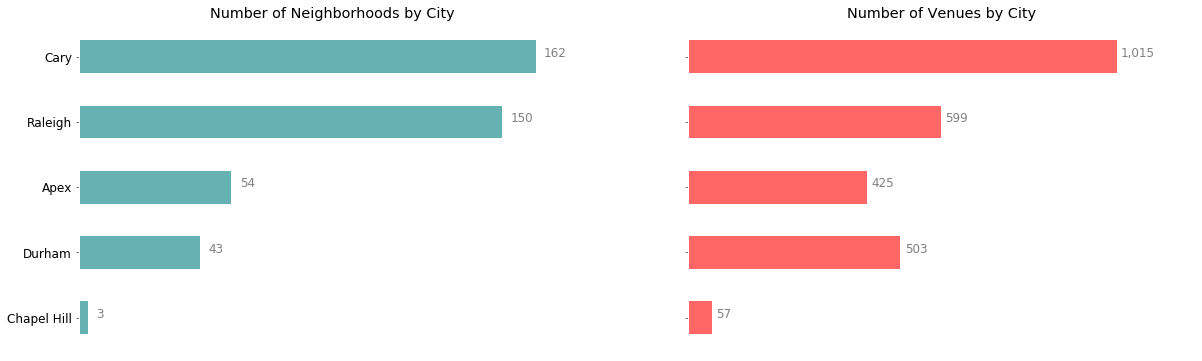

In [7]:
# Let's create 2 plots to answer these questions
fig = plt.figure(figsize=[20, 6])
ax1 = fig.add_subplot(1, 2, 1, facecolor='w')
ax2 = fig.add_subplot(1, 2, 2, facecolor='w', sharey=ax1)

# Add 1st plot to show number of neighborhoods by city
nbh_by_city = df_nbh['Neighborhood'].groupby(df_nbh['City']).count().sort_values()
nbh_by_city.plot(kind='barh',
                 title='Number of Neighborhoods by City',
                 color='teal',
                 alpha=0.6,
                 ax=ax1)
yticklabels = nbh_by_city.index

# Add 2nd plot to show number of venues by city
df_merged = triangle_venues.merge(df_nbh[['City', 'Neighborhood']], on='Neighborhood')
venues_by_city = df_merged['Venue'].groupby(df_merged['City']).count().reindex(yticklabels)
venues_by_city.plot(kind='barh',
                    title='Number of Venues by City',
                    color='red',
                    alpha=0.6,
                    ax=ax2)

# Define function to anotate the labels of each plot
def auto_annotate(series, size, axes=plt, color='grey', dist=0):
    for index, value in enumerate(series): 
        label = format(int(value), ',') # format int with commas

        # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
        axes.annotate(label, xy=(value + dist, index), color=color, ha='left', fontsize=size)
        
        
auto_annotate(nbh_by_city,
              axes=ax1,
              dist=3,
              size=12)

auto_annotate(venues_by_city,
              axes=ax2,
              dist=10,
              size=12)

# Improve the asthetic of the plot
ax1.set_xlim(0, 180) # Increase plot limit to make sure annotations are included
ax1.set_xticks([]) # Clean x tick marks
ax1.set_ylabel(None) # Clean y field name 'City'
ax1.set_yticklabels(labels=ax1.get_yticklabels(), fontdict={'fontsize': 12}, color='black') # Make city name pops

ax2.set_xlim(0, 1200)
ax2.set_xticks([])

plt.show()

According to the chart above, **Cary** leads in the number of neighborhoods, and subsequently in the number of venues. Raleigh comes in second in both criteria. Interestingly, even though **Durham** has less neighborhoods than **Apex**, the venues count is higher, suggesting denser concentration of venues around the Bull city. **Chapel Hill** is the sparsest city in term of neighborhoods and venues among the top 5 city of the Triangle.

**How many unique types of venues are there?**

In [8]:
print('There are {} unique types of venues.'.format(np.unique(triangle_venues['Venue Category']
                                                             ).shape[0]
                                                   )
     )
top10venues = triangle_venues['Venue'].groupby(triangle_venues['Venue Category']
                                              ).count().sort_values(ascending=False
                                                                   ).head(10)
print('Among them, the top 10 venue types with highest count are:', ', '.join(top10venues.index.values))


There are 283 unique types of venues.
Among them, the top 10 venue types with highest count are: Pizza Place, Pool, Park, Gym, Coffee Shop, Bar, Bakery, Mexican Restaurant, Trail, Sandwich Place


**What is the distribution of venue counts per neighborhood?**

Number of neighborhoods having 5 venues of less: 238
Number of neighborhoods having 10 venues or more: 68


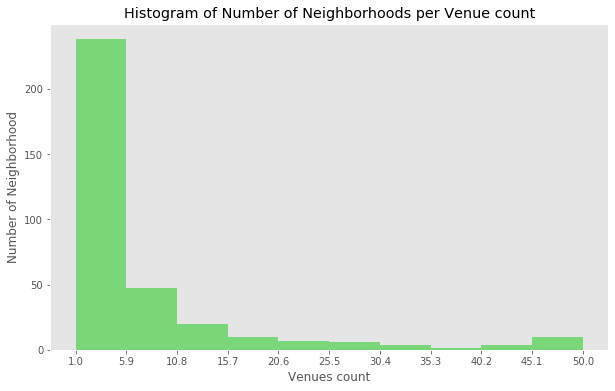

In [9]:
grouped_venues = triangle_venues['Venue'].groupby(triangle_venues['Neighborhood']).count()
count, bin_edges = np.histogram(grouped_venues) # Creating 10 bins of equal distance
grouped_venues.plot(kind='hist', figsize=(10, 6), xticks=bin_edges, facecolor='limegreen', grid=False, alpha=0.6)

plt.title('Histogram of Number of Neighborhoods per Venue count') # add a title to the histogram
plt.ylabel('Number of Neighborhood') # add y-label
plt.xlabel('Venues count') # add x-label

print('Number of neighborhoods having 5 venues of less: %.0i'%(grouped_venues < 6).sum())
print('Number of neighborhoods having 10 venues or more: %.0i'%(grouped_venues >= 10).sum())

plt.show()

The histogram above indicates a significant number of neighborhoods only have between 1 and 5 venues retrieved. Out of **412** neighborhoods, **68** of them have 10 venues or more, while **238** have 5 or less venues.

<a name='section3'></a>
### 3. METHODOLOGY
[Back to Top](#top)

<a name='section3a'></a>
#### 3a. Data preparation

As mentioned in the introduction, we will use K-means as a method to cluster the venues. Because the model does not work for categorical variables, we will have to convert the venue categories into binary format with one-hot encoding.

After that, I will apply the clustering model to determine the grouping of the neighborhoods based on their similarity in venues type.

##### One-hot encoding

In [10]:
# Use get_dummies method to turn categorical data for venues category to dummy variables
triangle_onehot = pd.get_dummies(triangle_venues[['Venue Category']], prefix="", prefix_sep="").drop('Neighborhood', axis=1)

# add neighborhood column back to dataframe
triangle_onehot.insert(0, 'Neighborhood', triangle_venues['Neighborhood'])
print('Dimensions: ', triangle_onehot.shape)
triangle_onehot.head()

Dimensions:  (2515, 283)


,Neighborhood,ATM,Accessories Store,Acupuncturist,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,...,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,American Tobacco District,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,American Tobacco District,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,American Tobacco District,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,American Tobacco District,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,American Tobacco District,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
The output of this will be a table showing higher frequency for the venue category with the higher count in a particular neighborhood.

In [11]:
triangle_grouped = triangle_onehot.groupby('Neighborhood').mean().reset_index()
print('Dimensions: ', triangle_grouped.shape)
triangle_grouped.head()

Dimensions:  (347, 283)


,Neighborhood,ATM,Accessories Store,Acupuncturist,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,...,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Abbington Ridge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,Adams Mountain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,Alexander Place Townhomes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,Allenbrook,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.055556,0.0
4,Alpha,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


##### Create dataframe with 10 most common venue of each neighborhood
The output will show us top 10 neighborhood based on frequencies for each neighborhoods

In [12]:
# Write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


# Create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = triangle_grouped['Neighborhood']

for ind in np.arange(triangle_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(triangle_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbington Ridge,Baseball Field,Yoga Studio,Garden Center,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Food
1,Adams Mountain,Trail,Event Space,Eye Doctor,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Yoga Studio
2,Alexander Place Townhomes,Construction & Landscaping,Gym / Fitness Center,IT Services,Pool,Gun Range,Yoga Studio,Fish Market,Fabric Shop,Farm,Farmers Market
3,Allenbrook,Pizza Place,Baseball Field,Bike Shop,Liquor Store,Sports Bar,Shoe Store,Grocery Store,Outlet Store,Sandwich Place,Chinese Restaurant
4,Alpha,Indian Restaurant,Dry Cleaner,Pharmacy,Supermarket,Fast Food Restaurant,Shopping Plaza,Gym / Fitness Center,Chinese Restaurant,Asian Restaurant,Discount Store


<a name='section3b'></a>
#### 3b. Modeling

We will now try to cluster the neighbors based on the frequencies of places in each neighborhood (`triangle_grouped` dataframe)

In [13]:
# set number of clusters
kclusters = 6

triangle_grouped_clustering = triangle_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(triangle_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 2, 2, 5, 2, 1, 3, 2])

After fitting the cluster model, I will now generate a joined dataframe which contains the neighborhoods, their coordinates, and the top 10 venues.

In [14]:
# Add cluster labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

triangle_merged = df_nbh

# Merge dataframes to a new one listing each neighborhood with latitudes, longitudes, and top 10 venue types
triangle_merged = triangle_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood', how='inner')
triangle_merged.head()

,City,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Durham,American Tobacco District,35.994792,-78.904638,2,Hotel,Pizza Place,Cocktail Bar,Burger Joint,Gym,Bakery,Tapas Restaurant,New American Restaurant,Peruvian Restaurant,Sushi Restaurant
1,Durham,Auburn,35.915278,-78.913248,2,Trail,Pool,Farmers Market,Baseball Field,Yoga Studio,Flower Shop,Farm,Fast Food Restaurant,Fish Market,Flea Market
2,Durham,Breedlove,35.986058,-78.831674,2,Business Service,American Restaurant,Breakfast Spot,Discount Store,Yoga Studio,Food,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market
3,Durham,Burch Avenue,35.999409,-78.918415,2,Coffee Shop,Event Space,Southern / Soul Food Restaurant,Student Center,Middle Eastern Restaurant,Bus Stop,Café,Market,Frozen Yogurt Shop,Pizza Place
4,Durham,Colonial Village,36.025216,-78.884720,3,Coffee Shop,Home Service,Yoga Studio,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop


<a name='section4'></a>
### 4. RESULT
[Back to Top](#top)

##### Visualizing the clusters on a map

In [15]:
# create map
map_clusters = folium.Map(location=[LATITUDE, LONGITUDE], zoom_start=9.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.Set1(np.linspace(0, 1, len(ys)))
markers_colors = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(triangle_merged['Latitude'], triangle_merged['Longitude'], triangle_merged['Neighborhood'], triangle_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker([lat, lon],
                        radius=4,
                        popup=label,
                        color=markers_colors[cluster-1],
                        fill=True,
                        fill_color=markers_colors[cluster-1],
                        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

<a name='c1'></a>
##### Cluster 1 (grey)

In [16]:
c1 = triangle_merged.loc[triangle_merged['Cluster Labels'] == 0, triangle_merged.columns[[0, 1] + list(range(5, triangle_merged.shape[1]))]]
c1.head(3)

,City,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
205,Cary,Baybrook,Bookstore,Social Club,Yoga Studio,Flower Shop,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Food & Drink Shop
214,Cary,Boxwood,Social Club,Yoga Studio,Flower Shop,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Food
266,Cary,Edinborough Pointe,Bookstore,Social Club,Yoga Studio,Flower Shop,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Food & Drink Shop


<a name='c2'></a>
##### Cluster 2 (red)

In [17]:
c2 = triangle_merged.loc[triangle_merged['Cluster Labels'] == 1, triangle_merged.columns[[0, 1] + list(range(5, triangle_merged.shape[1]))]]
c2.head(3)

,City,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
36,Durham,Valley Run,Recreation Center,Pool,Yoga Studio,Flower Shop,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market
41,Durham,Woodcroft,Trail,Pool,Playground,Yoga Studio,Flea Market,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Fish Market
42,Durham,Woodlake,Pool,Baseball Field,Yoga Studio,Flower Shop,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Food


<a name='c3'></a>
##### Cluster 3 (blue)

In [18]:
c3 = triangle_merged.loc[triangle_merged['Cluster Labels'] == 2, triangle_merged.columns[[0, 1] + list(range(5, triangle_merged.shape[1]))]]
c3.head(3)

,City,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Durham,American Tobacco District,Hotel,Pizza Place,Cocktail Bar,Burger Joint,Gym,Bakery,Tapas Restaurant,New American Restaurant,Peruvian Restaurant,Sushi Restaurant
1,Durham,Auburn,Trail,Pool,Farmers Market,Baseball Field,Yoga Studio,Flower Shop,Farm,Fast Food Restaurant,Fish Market,Flea Market
2,Durham,Breedlove,Business Service,American Restaurant,Breakfast Spot,Discount Store,Yoga Studio,Food,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market


<a name='c4'></a>
##### Cluster 4 (purple)

In [19]:
c4 = triangle_merged.loc[triangle_merged['Cluster Labels'] == 3, triangle_merged.columns[[0, 1] + list(range(5, triangle_merged.shape[1]))]]
c4.head(3)

,City,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Durham,Colonial Village,Coffee Shop,Home Service,Yoga Studio,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop
52,Raleigh,Amberfield,Home Service,Yoga Studio,Event Space,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop
59,Raleigh,Arbor at Harrington Grove,Home Service,Pool,Yoga Studio,Flea Market,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flower Shop


<a name='c5'></a>
##### Cluster 5 (yellow)

In [20]:
c5 = triangle_merged.loc[triangle_merged['Cluster Labels'] == 4, triangle_merged.columns[[0, 1] + list(range(5, triangle_merged.shape[1]))]]
c5.head(3)

,City,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Durham,Duke Park,Convenience Store,Park,Yoga Studio,Flea Market,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flower Shop
19,Durham,Northgate Park,Park,Dog Run,Yoga Studio,Eye Doctor,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop
109,Raleigh,Beaver Pond,Farm,Park,Yoga Studio,Flower Shop,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Food,Eye Doctor


<a name='c6'></a>
##### Cluster 6 (pink)

In [21]:
c6 = triangle_merged.loc[triangle_merged['Cluster Labels'] == 5, triangle_merged.columns[[0, 1] + list(range(5, triangle_merged.shape[1]))]]
c6.head(3)

,City,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,Durham,Parkside,Construction & Landscaping,Yoga Studio,Flower Shop,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Food
48,Raleigh,Alslee Oaks,Construction & Landscaping,Yoga Studio,Flower Shop,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Food
56,Raleigh,Andrews Hills,Construction & Landscaping,Yoga Studio,Flower Shop,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Food


<a name='section5'></a>
### 5. DISCUSSION
[Back to Top](#top)

Right from the map, we notice that the majority of neighborhoods fall into cluster **#3** and **#2**. Cluster **#4**, **#5**, and **#6** all have approximately similar number of neighborhoods. Most noticeably, cluster **#1** only include 3 very closely located neighborhood in Cary.

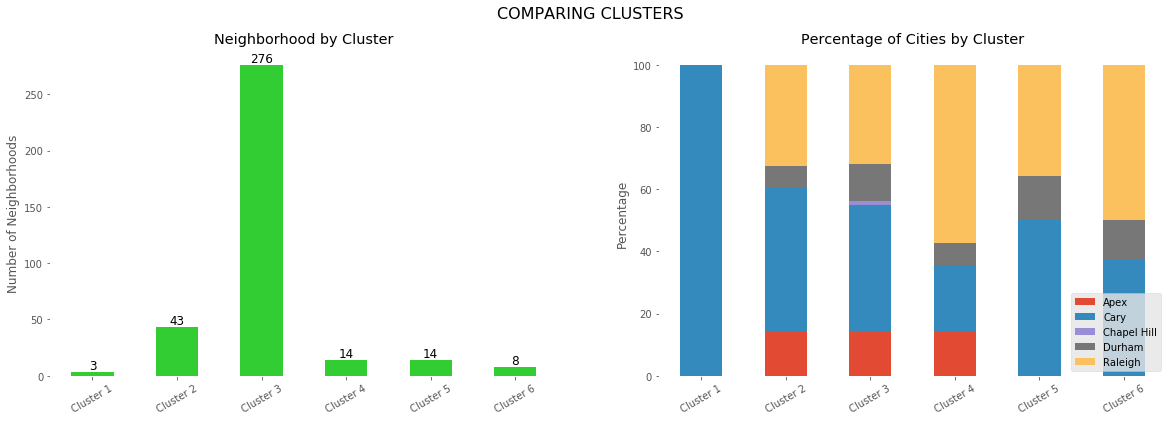

In [22]:
# Let's create 2 plots to answer these questions
fig = plt.figure(figsize=[20, 6])
ax1 = fig.add_subplot(1, 2, 1, facecolor='w')
ax2 = fig.add_subplot(1, 2, 2, facecolor='w')
fig.suptitle('COMPARING CLUSTERS', fontsize=16)

# Bar chart for count of neighborhood per cluster
triangle_merged.groupby('Cluster Labels')['Neighborhood'].count().plot(kind='bar',
                                                                             color='limegreen',
                                                                             title='Neighborhood by Cluster',
                                                                             grid=False,
                                                                             ax=ax1)
xlabels = triangle_merged.groupby('Cluster Labels')['Neighborhood'].count().index
ax1.set_xticklabels(['Cluster ' + str(i+1) for i in xlabels], rotation=30)
ax1.set_xlabel(None)
ax1.set_ylabel('Number of Neighborhoods')

for index, value in enumerate(triangle_merged.groupby('Cluster Labels')['Neighborhood'].count()):
    ax1.annotate(value, xy=[index, value], ha='center', va='bottom', fontsize=12)

# Percentage stacked bar chart
df_grouped = triangle_merged.groupby(['Cluster Labels', 'City']).agg({'Neighborhood':'count'})
df_grouped = df_grouped.groupby(level=0).apply(lambda x: 100*x / float(x.sum())).reset_index()
df_grouped = df_grouped.pivot(columns='City', index='Cluster Labels', values='Neighborhood')
df_grouped.plot(kind='bar',
                stacked=True,
                legend=False,
                grid=False,
                title='Percentage of Cities by Cluster',
                ax=ax2)
ax2.legend(loc='lower right')
ax2.set_xlabel(None)
ax2.set_ylabel('Percentage')
ax2.set_xticklabels(['Cluster ' + str(int(item.get_text())+1) for item in ax2.get_xticklabels()], rotation=30)

plt.show()


As expected, Cary has the highest number of neighborhoods across all 6 clusters, with the exception of cluster **#4**, due to the neighborhood data is heavily skewed toward the city. Raleigh is the major component in cluster **#4**. Even though cluster **#2** and **#3** has the highest count, **#4** and **#5** has broad coverage over the cities although each only has 14 neighborhoods.

##### Cluster characteristics
* [**Cluster 1:**](#c1) I would call this group the ***\"suburban outliers"*** due to it having the least number of neighborhoods, all of which is in Cary. Due to their close proximity to each other as shown on the map, they have very similar venue types like yoga studio, flower shop, farm, and different types of markets. 
* [**Cluster 2:**](#c2) this group can be called ***\"soakers' paradise"*** due to the fact that pool is in the top 2 venues for almost all of its member neighborhoods. Additionally, the neighborhoods in this group are in the outskirts where there are an abundant number of farms around.
* [**Cluster 3:**](#c3) this group of ***\"diverse downtown"*** neighborhoods is the largest among the clusters. Browsing through the list of top places, one common theme pops out is that they carry a wide range of places that are attractive folks from a wide range of backgrounds to gather and entertain. Most evidently, this cluster of neighborhoods are denser in downtown areas of Durham, Cary, and Apex. Despite being a bit more spread out, neighborhoods in this cluster scatter from Raleigh's downtown area and spread northward. Given the size of this group, I am interested in dissecting it down further in future projects to see how the neighborhoods split up. Additionally, it would be interesting to see if this area has any correlation with average income of the residents here.
* [**Cluster 4:**](#c4) ***\"home service"*** businesses are the most stand-out feature of neighborhoods in this group. The neighborhoods are on the outskirts of cities with large population and higher income like Raleigh and Cary.
* [**Cluster 5:**](#c5) with parks as the top venues for almost all neighborhoods in this cluster, I think the name ***\"outdoor world*"** is be-fitting these areas. Interestingly, contrary to common beliefs, these neighborhoods can position either close to the bustling downtown area, or a little farther out into the suburb.
* [**Cluster 6:**](#c6) as the second smallest group, these ***\"up-and-coming residential"*** neighborhoods all have Construction & Landscaping as their top venues. These areas situated a little further from the city, and is likely the result of the expanding population in the Triangle.


<a name='section6'></a>
### 6. CONCLUSION
[Back to Top](#top)

As one of a few technological hubs outside of Silicon Valley, the Triangle area in North Carolina is a robust, fast growing region that are becoming more and more attractive to a larger group of employers and professionals. I hope this project acts as a guide to what you can expect of the area around Research Triangle Park when moving or working here. The result of the KMeans clustering model have revealed interesting insights about the 6 groups of neighborhoods, and helped me understand more about the neighborhoods around which I have been living for 5 years!

That being said, having such a large number of neighborhoods in cluster #3 really makes me want to dissect this further and see if there's any other pattern in those 276 neighborhoods. I will save that for the next installment of this Battle of the Neighborhood. Until then, *keep data forward!*

<a name='section7'></a>
### 7.ACKNOWLEDGEMENT
[Back to Top](#top)

**Data:** in order of usage
  * Link, A. N., & Scott, J. T. (2003). The Growth of Research Triangle Park. *Small Business Economics*, 20(2), 167-175.
  * Research Triangle. (2020, May 6). Retrieved from https://en.wikipedia.org/wiki/Research_Triangle
  * Stats about all US cities - real estate, relocation info, crime, house prices, cost of living, races, home value estimator, recent sales, income, photos, schools, maps, weather, neighborhoods, and more. (n.d.). Retrieved from http://www.city-data.com/
  * Venues data retrived from Foursquare Developer service

**Libraries:** in alphabetic order
  * Beautiful Soup 4
  * Folium
  * Geopy
  * Matplotlib
  * Numpy
  * Pandas
  * Scikit Learn
  * Seaborn
